# Part I - (FordGo Bike Trip Data Exploration)
## by Abdur-Roqeeb O. Ismail

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### Outline
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Univariate Exploration](#Univariate-Exploration)
- [Bivariate Exploration](#Bivariate-Exploration)
- [Multivariate Exploration](#Multivariate-Exploration)
- [Conclusions](#Conclusions)

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bike = pd.read_csv('fordgo_bike.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Data Cleaning

1. Drop rows with empty data
2. Change the data type of start_station_id, end_station_id and bike_id to string
3. Change the data type of start_time and end_time to datetime
4. Change the data type of member_birth_year to int
5. Extract hour, day and month from the start_time and end_time columns

In [4]:
# 1. Drop rows with empty data
bike.dropna(inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
# 2. Change the data type of start_station_id, end_station_id and bike_id to string
bike.start_station_id = bike.start_station_id.astype('str')
bike.end_station_id = bike.end_station_id.astype('str')
bike.bike_id = bike.bike_id.astype('str')

In [6]:
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# 3. Change the data type of start_time and end_time to datetime
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [8]:
print(type(bike.start_time[0]))
print(type(bike.end_time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
# 4. Change the data type of member_birth_year to int
bike.member_birth_year = bike.member_birth_year.astype('int')

In [10]:
type(bike.member_birth_year[0])

numpy.int32

In [11]:
# Extract start day and end day
bike['start_day'] =  bike.start_time.dt.day_name()
bike['end_day'] =  bike.end_time.dt.day_name()

# Extract date
bike['start_date'] = bike.start_time.map(lambda x: x.strftime('%m-%d'))
bike['end_date'] = bike.end_time.map(lambda x: x.strftime('%m-%d'))

# Extract month names
bike['start_month'] = bike.start_time.dt.month_name()
bike['end_month'] = bike.end_time.dt.month_name()

In [12]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_date,end_date,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,Thursday,Friday,02-28,03-01,February,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,Thursday,Friday,02-28,03-01,February,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,Thursday,Friday,02-28,03-01,February,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,Thursday,Friday,02-28,03-01,February,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,Thursday,Friday,02-28,03-01,February,March


In [13]:
# Change the day and months to ordered categorical variables
days_ordered = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

days = pd.api.types.CategoricalDtype(ordered=True, categories=days_ordered)
months = pd.api.types.CategoricalDtype(ordered=True, categories=months_ordered)

bike.start_day = bike.start_day.astype(days)
bike.end_day = bike.end_day.astype(days)

bike.start_month = bike.start_month.astype(months)
bike.end_month = bike.end_month.astype(months)

In [14]:
# Calculate member_age from member_birth_year column
bike['member_age'] = 2019 - bike.member_birth_year

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [16]:
# Create duration_hour from duration_sec column
bike['duration_hour'] = round((bike.duration_sec / 3600), 2)

In [17]:
bike.duration_hour.head()

0    14.50
2    17.18
3    10.14
4     0.44
5     0.50
Name: duration_hour, dtype: float64

In [18]:
bike.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?
The dataset contains information about 174,952 bike trips in San Francisco Bay Area with 24 features

### What is/are the main feature(s) of interest in your dataset?
I am most interested in figuring out features best for predicting where and when most rides are made as well as the trip duration.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Start and End stations
- Start Day of the week
- Duration of ride
- The user type (Subscriber or customer) 

## Univariate Exploration

In [20]:
# set plotting style
sb.set_theme(style = 'darkgrid')
base_color = sb.color_palette()[0]

In [21]:
# define a function for countplot
def count_plot(arg, x_label, y_label, title):
    '''Creates a count plot and set axis labels and title'''
    sb.countplot(data=bike, x=arg, color=base_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

### Which day of the week was most trips taken?

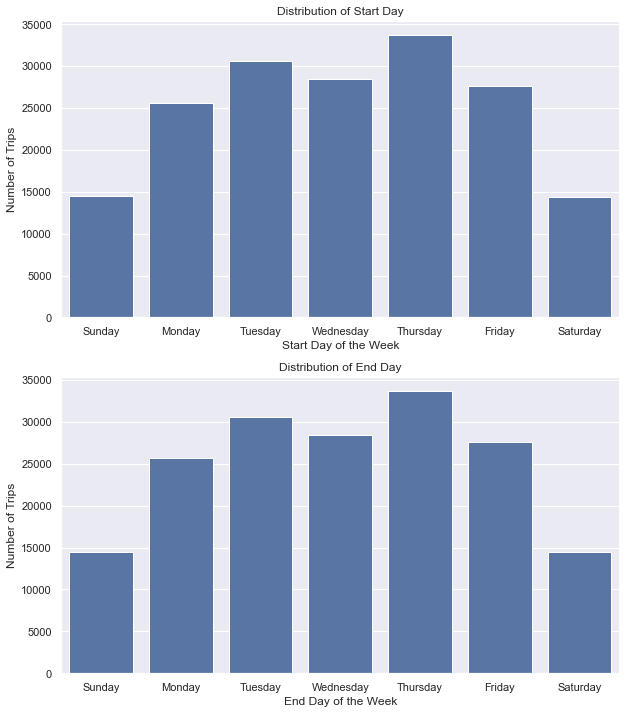

In [22]:
plt.figure(figsize=[10,12])

plt.subplot(2, 1, 1)
count_plot('start_day', 'Start Day of the Week', 'Number of Trips', 'Distribution of Start Day')

plt.subplot(2, 1, 2)
count_plot('end_day', 'End Day of the Week', 'Number of Trips', 'Distribution of End Day')

We can see from the chart above that most trips were taken on Thursdays. It is the same day that most trips ended.

### How does the user type influence the number of trips taken?

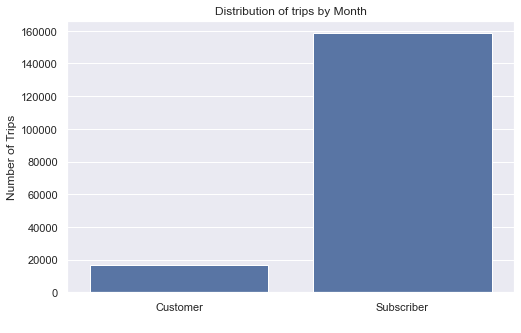

In [23]:
plt.figure(figsize=[8,5])
count_plot('user_type', ' ', 'Number of Trips', 'Distribution of trips by Month')

We can see from the plot above that about 16,000 of the total users are Subscribers while less than 20000 are ordinary customers.

### What is the gender distribution of users?

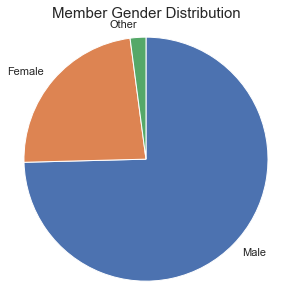

In [24]:
sorted_counts = bike.member_gender.value_counts()
plt.figure(figsize=[5,5])
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Member Gender Distribution', fontsize=15);

A relatively large proportion of the members are male, as we can see from the chart that Male covers about three-quarter of the pie chart

### What is the distribution of age of users?

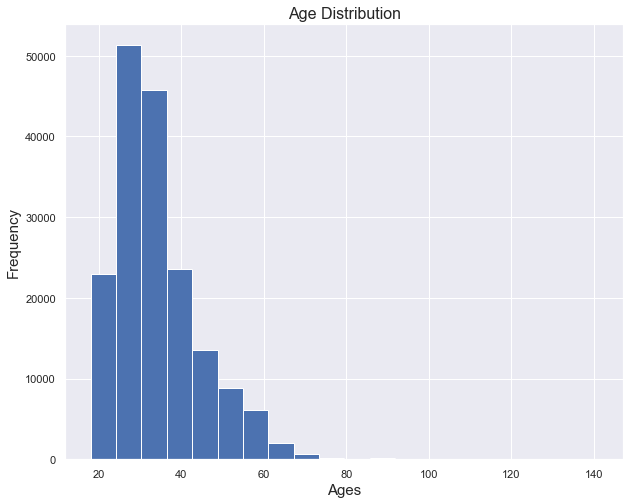

In [25]:
plt.figure(figsize=[10,8])
bike.member_age.hist(bins=20, color=base_color)
plt.xlabel('Ages', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Age Distribution', fontsize=16);

The distribution is a right-skewed distribution with a long tail which means that we have some outliers in the ages. These outliers can be visualized better with a boxplot.

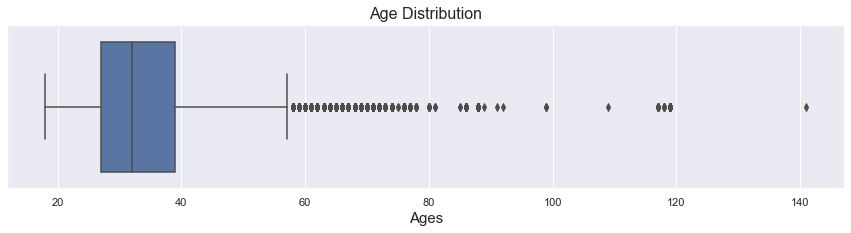

In [26]:
plt.figure(figsize=[15,3])
sb.boxplot(data=bike, x='member_age', color=base_color)
plt.xlabel('Ages', fontsize=15)
plt.title('Age Distribution', fontsize=16);

The outliers can be seen clearly now. Let us plot the histogram again by filtering out members with ages greater than 80

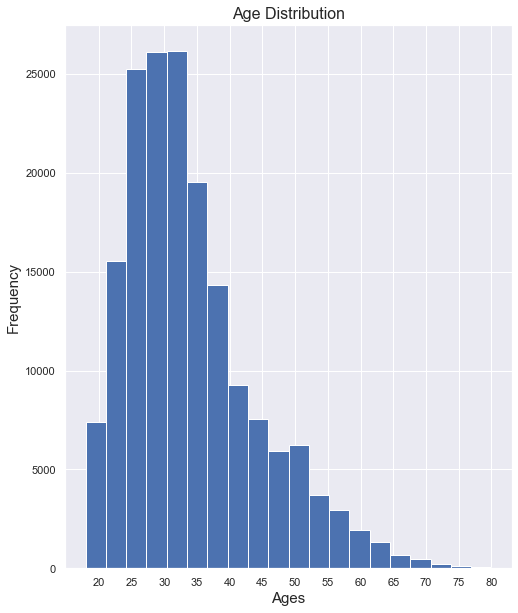

In [27]:
# create a dataframe of members with age less than or equal to 80
bike_sub = bike[bike.member_age <= 80]

# show the distribution with a histogram
plt.figure(figsize=[8,10])
bike_sub.member_age.hist(bins=20, color=base_color)
plt.xticks(np.arange(20,85,5),np.arange(20,85,5))
plt.xlabel('Ages', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Age Distribution', fontsize=16);

It can be seen from the distribution that majority of the users are young men with the peak of the distribution around 25-35. To get a better context of the age distribution, I will place the ages into age groups and visualize the proportion of each group with a bar chart.

In [28]:
bins= np.arange(10, 90, 10)
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']
bike['age_group'] = pd.cut(bike['member_age'], bins=bins, labels=labels)

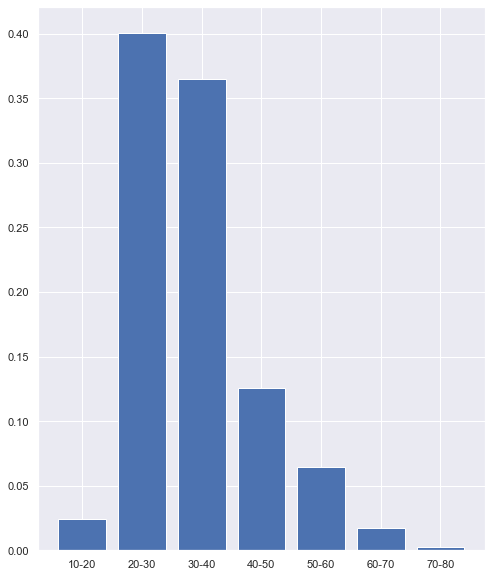

In [29]:
age_group_props = bike.age_group.value_counts(normalize=True, sort=False)
plt.figure(figsize=[8,10])
plt.bar(age_group_props.index, age_group_props.values, color=base_color);

### What are the most used start and end stations?

In [30]:
# Filter top 10 used start and end stations
start_filter = bike.start_station_name.value_counts().head(10)
end_filter = bike.end_station_name.value_counts().head(10)

# Create dataframe of most used stations
top_start = bike[bike.start_station_name.isin(start_filter.index)]
top_end = bike[bike.end_station_name.isin(end_filter.index)]

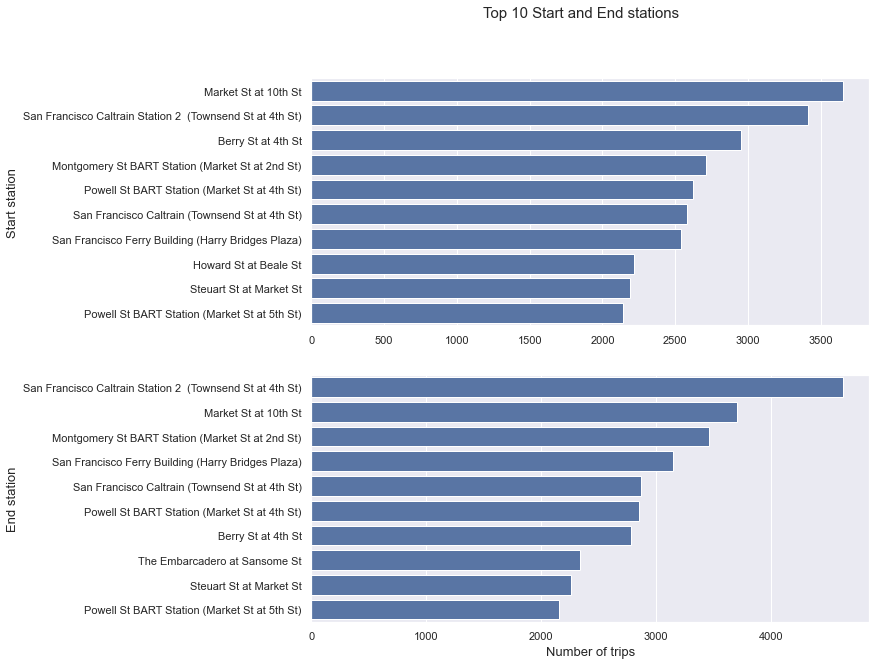

In [31]:
plt.figure(figsize=(10,10))
plt.suptitle('Top 10 Start and End stations', fontsize=15 );

plt.subplot(2,1,1)
sb.countplot(data=top_start, y='start_station_name', color=base_color, order= start_filter.index);
plt.ylabel('Start station', fontsize=13)
plt.xlabel(' ')

plt.subplot(2,1,2)
sb.countplot(data=top_end, y='end_station_name', color=base_color, order= end_filter.index);
plt.ylabel('End station', fontsize=13)
plt.xlabel('Number of trips', fontsize=13);

The station where most trips started from is the station at Market Street and 10th Street, while most trips ended at San Francisco Caltrain Station 2. Most of the stations where most trips occured are around Market Street.

## Bivariate Exploration

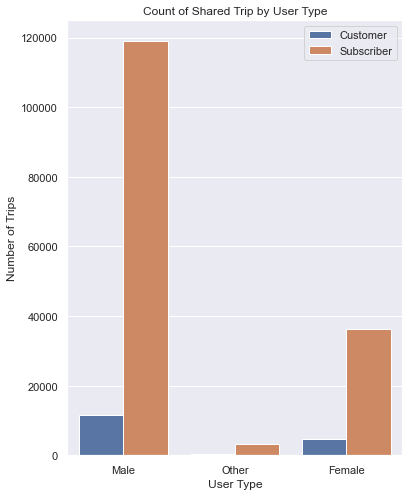

In [32]:
plt.figure(figsize=[6,8])
g = sb.countplot(data=bike, x='member_gender', hue='user_type')
plt.legend(loc='upper right')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Count of Shared Trip by User Type');

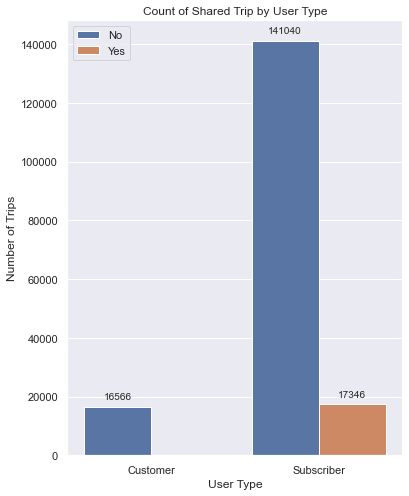

In [33]:
plt.figure(figsize=[6,8])
g = sb.countplot(data=bike, x='user_type', hue='bike_share_for_all_trip')
plt.legend(loc='upper left')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Count of Shared Trip by User Type');

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)

Less than 20,000 of the total subscribers took a shared trip while none of the customers did. 

### What is the average duration of trips per day?

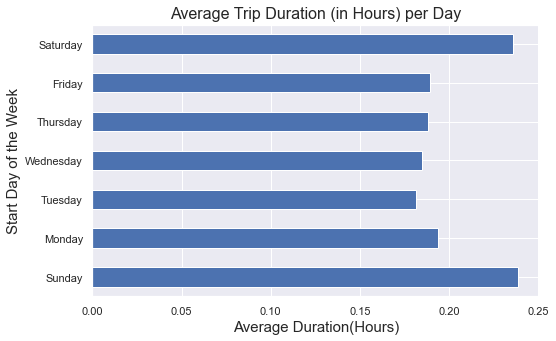

In [34]:
avg_duration_per_day = bike.groupby('start_day').duration_hour.mean()
plt.figure(figsize=[8,5])
avg_duration_per_day.plot(kind='barh', color=base_color)
plt.ylabel('Start Day of the Week', fontsize=15)
plt.xlabel('Average Duration(Hours)', fontsize=15)
plt.title('Average Trip Duration (in Hours) per Day', fontsize=16);

On average, weekend trips are longer than trips taken during the week. This might be because users do not go to work on weekends.

### What is the average duration used on a trip by user type?

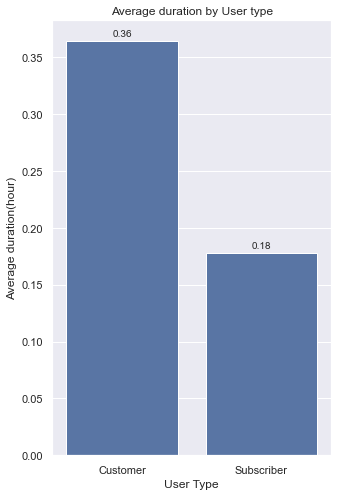

In [35]:
plt.figure(figsize=[5,8])
g = sb.barplot(data=bike, x='user_type', y='duration_hour', ci=None, color=base_color)
plt.title('Average duration by User type', );
plt.xlabel('User Type');
plt.ylabel('Average duration(hour)');

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')

The average duration of trips taken by customers is about twice that of trips taken by subscribers.

### Does bike sharing affect the duration of the trip?

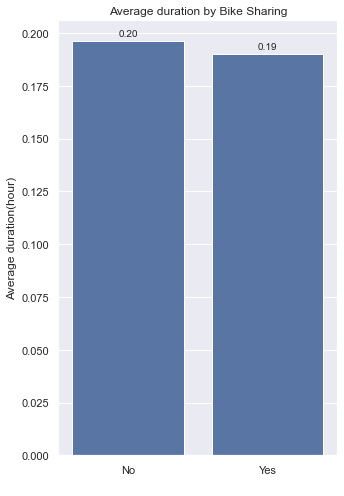

In [36]:
plt.figure(figsize=[5,8])
g = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_hour', ci=None, color=base_color)
plt.title('Average duration by Bike Sharing')
plt.xlabel(' ')
plt.ylabel('Average duration(hour)');

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')

Bike sharing has a slight effect on the duration of the trip because the duration of trips where bike was not shared is about 0.1 longer than those where bike was shared.

### What is the average trip duration at the top 10 start and end stations?

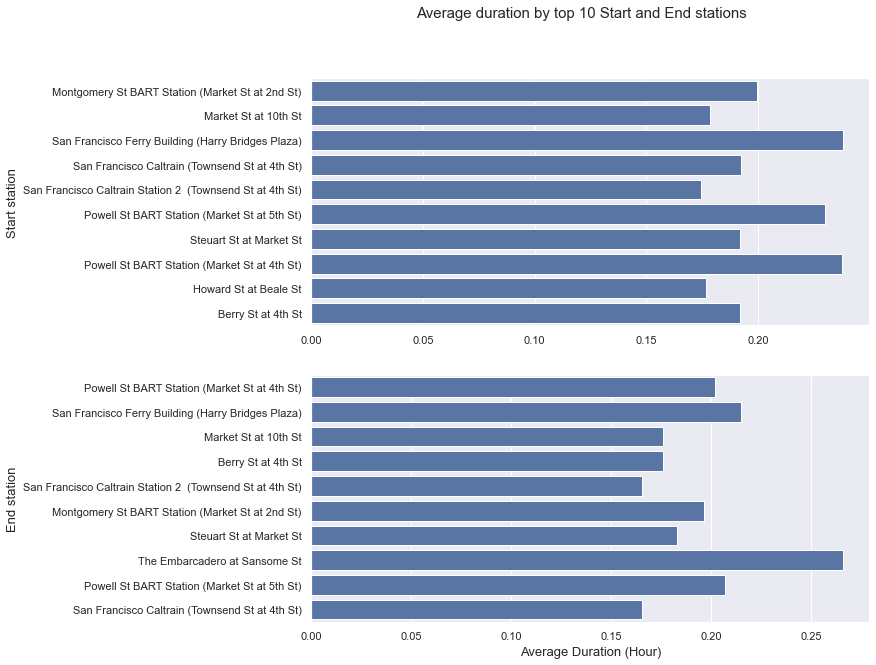

In [37]:
plt.figure(figsize=(10,10))
plt.suptitle('Average duration by top 10 Start and End stations', fontsize=15 );

plt.subplot(2,1,1)
sb.barplot(data=top_start, x='duration_hour', y='start_station_name', ci=None, color=base_color);
plt.ylabel('Start station', fontsize=13)
plt.xlabel(' ', fontsize=13)

plt.subplot(2,1,2)
sb.barplot(data=top_end, x='duration_hour', y='end_station_name', ci=None, color=base_color);
plt.ylabel('End station', fontsize=13)
plt.xlabel('Average Duration (Hour)', fontsize=13);

Trips that start at Powell Street BART station and San Francisco Ferry Building are longer than those that started from oter stations. Also, trips that end at The Embarcadero at Sansome Street are also longer than those ending at other stations.

## Multivariate Exploration

### What is the average duration of trips by age group and member gender?

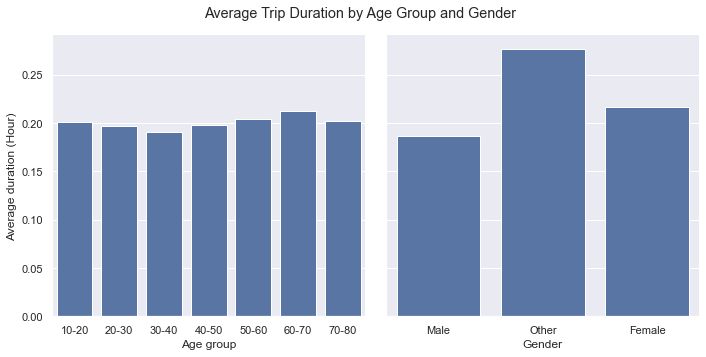

In [38]:
g = sb.PairGrid(bike, x_vars=['age_group', 'member_gender'], y_vars='duration_hour', height=5)
g.map(sb.barplot, color=base_color, ci=None)
g.axes[0,0].yaxis.set_label_text('Average duration (Hour)')
g.axes[0,0].xaxis.set_label_text('Age group')
g.axes[0,1].xaxis.set_label_text('Gender')
g.fig.suptitle('Average Trip Duration by Age Group and Gender')
g.fig.subplots_adjust(top=0.9);

While there are just slight differences in the average trip durations across different age groups, the average trip duration of members with their gender as 'Others' is higher than that of males and females.

### Does user type affect the average duration in any of the days of the week?

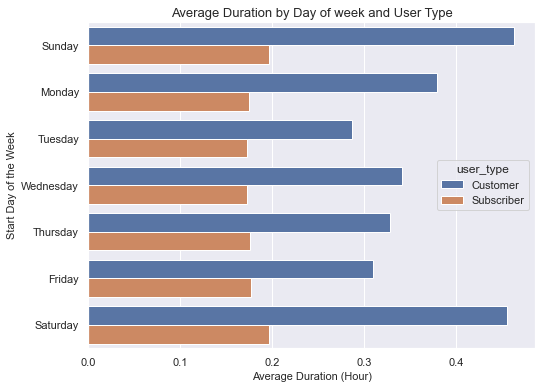

In [39]:
plt.figure(figsize=[8,6])
sb.barplot(data=bike, x='duration_hour', y='start_day', hue='user_type', ci=None)
plt.ylabel('Start Day of the Week', fontsize=11)
plt.xlabel('Average Duration (Hour)', fontsize=11)
plt.title('Average Duration by Day of week and User Type', fontsize=13);

Across all the days of the week, the average trip duration of users that are customers is higher than that of subscribers.

## Conclusions
- The number of trips taken on days that are not weekends are higher than the number of trips on weekends.
- A large percentage of users are males and subscribers.
- Most users are youths with age between 20  to 40 years.
- Most stations that fall in the top 10 start and end stations are located around Market Street.
- While few subscribers took a shared bike for their trip, none of the customers did.
- Average duration of trips taken during weekends is higher than that of other days. This might be because users have more time to spend on their trips on weekends than on working days.
- Trips taken by customers are on an average as twice as higher than those taken by subscribers

In [40]:
# save the modified dataset to a csv file
bike.to_csv('bike_modified.csv', index=False)